### Quantum Cryptography -Day 4
# No Cloning Theorem(Simulation Proof)
In Quantum computing the **no-cloning theorem** states that  it is **impossible to create an identical copy of an arbitrary unknown quantum state**,This is the fundamental diffrenece between classical and Quantum information. 

In this notebook, we **we numerically simulate an attempt to clone an unknown quantum state**,compare the original and copied states ,compute their **fidelity** and visualize the **fidelity loss**. 

In this notebook we will learn:
- Why unknown quantum state cannot be perfectly cloned
- How a naive cloning attempt fails
- How to represents quantum state using vectors
- How to measure similarity using **fidelity**
- How fidelity loss demonstrate the No-Cloning Theorem

## Import Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 1 - Create Unknown Qunatum State
A general single qubit quantum state is :
$$ 
|\psi\rangle=\alpha|0\rangle + \beta|1\rangle 
$$
Where:
- $ \alpha $  and  $\beta $  are complex number 
- $ |\alpha|^2 +|\beta|^2 =1 $

We perform this step because No-Cloning Theorem applies to **unknown arbitrary states** not just basic state like |0> or |1>


In [2]:
## generate random quantum unknown state
theta=np.random.rand()*np.pi
phi =np.random.rand()*2*np.pi
alpha=np.cos(theta/2)
beta=np.exp(1j *phi) * np.sin(theta/2)
psi=np.array([alpha,beta])

# Normalize this state for safety
psi=psi/np.linalg.norm(psi)
psi

array([ 0.99861979+0.j        , -0.03714075-0.03713592j])

## Step 2 : Attempt to clone The Quantum State
 - **Classical Intuition**:In classical computing,copying information is trivial
 - **Quantum Reality** :There is **no unitary operation** that can copy an unknown quantum state.

- We **pretend** the clone by forcing  the sencond qubit match to first
- This represents a **naive and illgal cloning attempt**
- This allow us to **observe failure numerically** 

In [4]:
# Fake cloning Attempt(imperfect)
copied_state=np.array([alpha,np.sin(theta/2)])
copied_state=copied_state/np.linalg.norm(copied_state)
copied_state

array([0.99861979, 0.05252153])

## Step 3 : Compare Original Vs Copied states
To measure how similar two quantum state are , we use **fidelity**.

#### Fidelity Formula:
$$
F=|\langle\psi|\phi\rangle|^2
$$
- Fidelity = 1  $\rightarrow$ perfect copy
- Fidelity < 1  $\rightarrow$ imperfect copy

#### Why Fidelity?
it is the standerd  matrice used in qunatum information thoery.

In [6]:
def fidelity(state1,state2):
    return np.abs(np.vdot(state1,state2))**2
fid = fidelity(psi,copied_state)
fid

np.float64(0.9906075796269854)

## Step 4 : Fidelity Loss across Multiple states
To strenghten the proof , we repeate the experiment for **many random quantu state**.so we get effect as:
- Fidelity is **never consistently equal to 1**
- This confirms cloning failure is **Fundamental**,not accidental



In [8]:
fidelities=[]
for _ in range(100):
    theta= np.random.rand()*np.pi
    phi= np.random.rand()*2*np.pi

    psi =np.array([
        np.cos(theta/2),
        np.exp(1j*phi)*np.sin(theta/2)
    ])
    psi/=np.linalg.norm(psi)

    fake_copy=np.array([
        np.cos(theta/2),
        np.sin(theta/2)
    ])
    fake_copy/=np.linalg.norm(fake_copy)

    fidelities.append(fidelity(psi,fake_copy))
    np.mean(fidelities)

## Step 5 : Plot Fidelity Loss
A visual plot makes the **No-Cloning Theorem Intuitive**

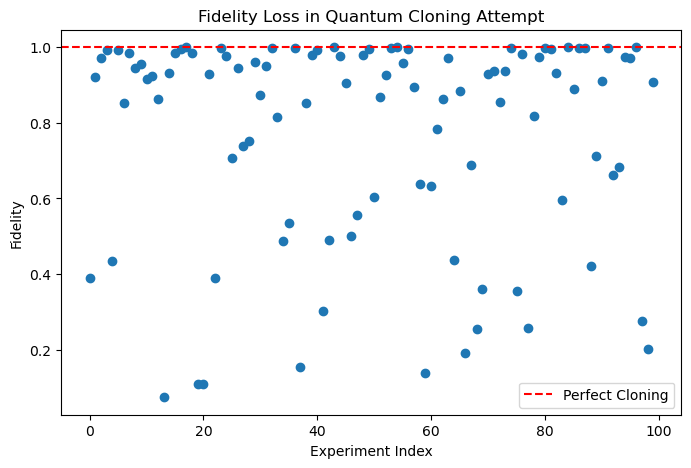

In [9]:
plt.figure(figsize=(8,5))
plt.plot(fidelities,marker='o',linestyle='none')
plt.axhline(1,color='red',linestyle='--',label='Perfect Cloning')
plt.xlabel("Experiment Index")
plt.ylabel('Fidelity')
plt.title('Fidelity Loss in Quantum Cloning Attempt')
plt.legend()
plt.show()

- We observed the fidelity in near to 0.99.. not exactly  1.0 (this means **Perfect cloning did not happen**).
- Our graph Shows:
    - Most Blue dots close to the red dashed line(1.0) means some state are accidentally easier to approximate.
    - Some blue dots clearly below to red line means cloning fails for arbitrary unknown state.
- This behaviour is exactlywhat the no-Cloning theorem predict:
    - No Universal operation can clone all quntum state perfectly.
    - Even a small deviation from 1 proves impossibility.

## Conclusion
 - Perfect cloning (Fidelity=1) is **not achivable**
 - Fidelity loss appears for **arbitrary unknown state** 
 - This numerical experiments **confirms the No-cloning Theorem**

 So in this notebook we simulate cloning attempt  on unknown quantum state,measured fidelity between original and copied state and show the fidelity constently drop -demonstrating the No-cloning Thorem Computationally. 

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day04_No_Cloning_Theorem.ipynb

**Date created**: 27-Janaury-2026

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>